<a href="https://colab.research.google.com/github/hyeonjun/AlphaZero/blob/master/4_1_Reinforcement_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다중 슬롯머신 문제
여러 개의 팔을 가진 슬롯머신(slot machine). 슬롯머신의 팔마다 코신이 나오는 확률은 정해져 있지만, 그 확률값은 미리 알 수 없다. 제한된 횟수 안에서 가장 많은 코인을 얻으려면 어떤 순서로 팔을 선택해야 하는지가 '다중 슬롯머신 문제'라고 부른다.

* 다중 슬롯머신 문제에서의 강화 학습 요소

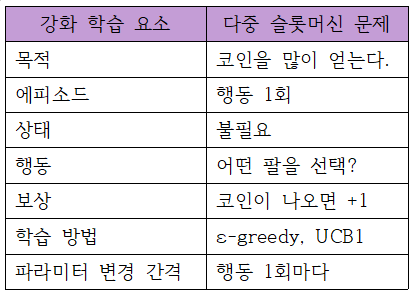

* 다중 슬롯머신 문제에서의 강화 학습 사이클

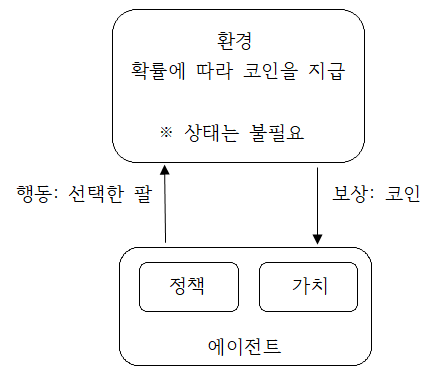




# 탐색과 이용
코인이 나올 확률이 높은 팔을 선택해야 하지만, 그 확률은 사전에 알 수 없다.
때문에 처음에는 정보 수집을 위해 슬롯머신의 팔을 선택한다. 이 행동을 탐색(exploration)이라고 부른다.

정보를 수집하면 해당 정보를 기반으로 보상이 가장 높다고 판단한 팔을 선택한다. 이 행동을 이용(exploitation)이라고 한다.

탐색과 이용은 트레이드오프 관계. 정보 수집을 위해 탐색을 계속하면 어떤 팔을 당겼을 때 보상이 높은지 알 수 있지만, 이 과정만으로는 실제 보상이 높은 팔을 계속 이용하는 경우보다 이익은 줄어든다.

반대로 계속 이용만 하면 현시점에서 기대한 보상보다 높은 보상을 얻을 수 있는 팔을 발견하지 못할 가능성이 있다. 이익을 최대화하기 위해서는 탐색과 이용의 균현을 맞추는 것이 중요하다.

# 탐색과 이용의 균현을 잡는 방법
탐색과 이용의 균형을 잡는 방법으로는 ε-greedy, UCB1이 알려져 있다.

* ε-greedy

'ε-greedy'는 확률 ε(0이상 1이하의 정수)으로 랜덤하게 행동을 선택(탐색)하고, 1-ε의 확률로 초기 보상이 최대가 되는 행동을 선택(이용)하게 하는 방법이다. ε이 0.1일 때 최적인 경우가 많다.

* UCB1(Upper Confidence Bounde 1)

UCB1은 '성공률 + 바이어스'를 최대로 만드는 행동을 선택하는 방법. '성공률'은 '해당 행동의 성공 횟수 / 해당 행동의 시행 횟수'다. '바이어스'는 '우연에 의한 성공률의 분포 크기'로 해당 행동의 시행 횟수가 작을수록 커지다.

'성공률 + 바이어스' 값

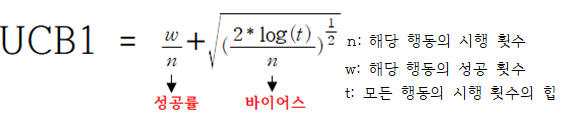

In [ ]:
# 패키지 임포트
import numpy as np
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 슬롯 게임 생성
슬롯의 팔을 표시하는 클래스 'SlotArm'을 생성. 생성자 인수로 '코인이 나올 확률'을 지정하고, draw()로 팔을 선택한 경우의 보상을 얻는다.

* SlotArm의 한 가지 멤버 변수

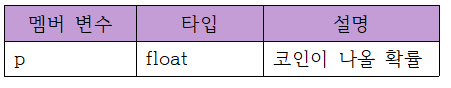

* SlotArm의 두 가지 메소드

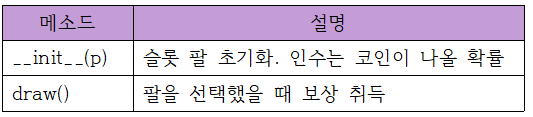

In [ ]:
# 슬롯 팔 생성
class SlotArm():
  # 슬롯 팔 초기화
  def __init__(self, p):
    self.p = p # 코인이 나올 확률
  
  # 팔을 선택했을 때의 보상 취득
  def draw(self):
    if self.p > random.random():
      return 1.0
    else:
      return 0.0


# ε-greedy 계산 처리
ε-greedy 계산 처리를 수행하는 클래스 'EpsilonGreedy'를 생성한다.

생성자의 인수에 '팔의 수'를 지정하고, select_arm()으로 정책에 따라 팔을 선택한다. 이후 update()로 시행 횟수와 가치를 업데이트한다.

* EpsilonGreedy의 3가지 멤버 변수

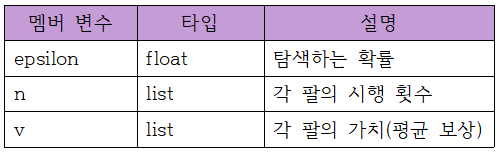

* EpsilonGreedy의 다섯가지 메소드

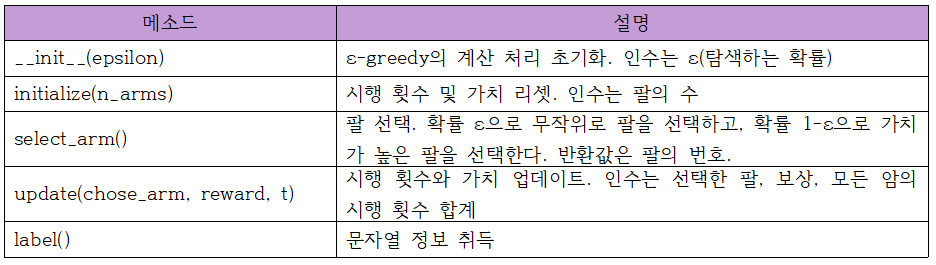

In [ ]:
# ε-greedy 계산 처리
class EpsilonGreedy():
  # ε-greedy 계산 처리 초기화
  def __init__(self, epsilon):
    self.epsilon = epsilon # 탐색하는 확률
  
  # 시행 횟수와 가치 초기화
  def initialize(self, n_arms):
    self.n = np.zeros(n_arms) # 각 팔의 시행 횟수
    self.v = np.zeros(n_arms) # 각 팔의 가치
  
  # 팔 선택
  def select_arm(self):
    if self.epsilon > random.random():
      # 랜덤으로 팔 선택
      return np.random.randint(0, len(self.v))
    else:
      # 가치가 높은 팔 선택
      return np.argmax(self.v)
  
  # 알고리즘 파라미터 갱신
  def update(self, chosen_arm, reward, t):
    # 선택한 팔의 시행 횟수 +1
    self.n[chosen_arm] += 1

    # 선택한 팔의 가치 갱신
    n = self.n[chosen_arm]
    v = self.v[chosen_arm]
    self.v[chosen_arm] = ((n-1) / float(n) * v + (1 / float(n)) * reward)
  
  # 문자열 정보 취득
  def label(self):
    return 'ε-greedy('+str(self.epsilon)+')'

# 알고리즘 파라미터 갱신
ε-greedy 알고리즘의 파라미터는 다음 순서에 따라 갱신한다.

1. 선택한 팔의 시행 횟수 +1
2. 선택한 팔의 가치 갱신

선택한 팔의 가치(평균 보상)는 다음 수식으로 갱신한다. '평균 보상'은 '누적 보상 / 시행 횟수'이지만, 다음 식을 이용하면 '이전 회에서의 평균 정보'와 이번 시행의 보상'으로부터 가치를 구할 수 있다.

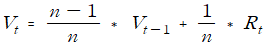

위 수식을 코드화시키면
```
n = self.n[chosen_arm]
v = self.v[chosen_arm]
self.v[chosen_arm] = ((n-1) / float(n)) * v + (1 / float(n)) + reward
```
가 된다.

# UCB1 계산 처리
UCB1의 계산 처리를 수행하는 클래스 'UCB1'을 생성한다.

initialize()의 인수에 팔 수를 지정하고, select_arm()으로 정책에 따라 팔을 선택한다. 이후, update()로 시행 횟수와 가치를 갱신한다.

* UCB1의 세 가지 멤버 변수

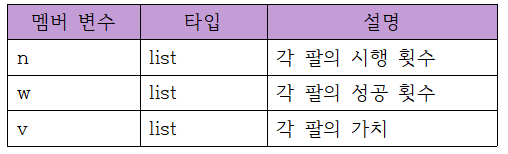

* UCB1의 네 가지 메소드

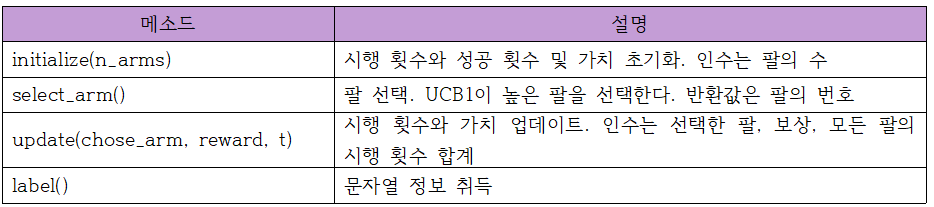

In [ ]:
# UCB1 알고리즘
class UCB1():
  # 시행 횟수, 성공 횟수 및 가치 초기화
  def initialize(self, n_arms):
    self.n = np.zeros(n_arms) # 각 팔의 시행 횟수
    self.w = np.zeros(n_arms) # 각 팔의 성공 횟수
    self.v = np.zeros(n_arms) # 각 팔의 가치
  
  # 팔 선택
  def select_arm(self):
    # n이 모두 1 이상이 되도록 팔을 선택
    for i in range(len(self.n)):
      if self.n[i] == 0 :
        return i
    # 가치가 높은 팔을 선택
    return np.argmax(self.v)

  # 알고리즘의 파라미터 갱신
  def update(self, chosen_arm, reward, t):
    # 선택한 팔의 시행 횟수 +1
    self.n[chosen_arm] += 1

    # 성공 시, 선택한 팔의 성공 횟수 +1
    if reward == 1.0:
      self.w[chosen_arm] += 1
  
    # 시행 횟수가 0인 팔이 존재하는 경우에는 가치를 갱신하지 않음
    for i in range(len(self.n)):
      if self.n[i] == 0:
        return 
  
    # 각 팔의 가치 갱신
    for i in range(len(self.v)):
      self.v[i] = self.w[i] / self.n[i] + (2*math.log(t) / self.n[i]) ** 0.5
  
  # 문자열 정보 취득
  def label(self):
    return 'ucb1'



# 알고리즘 파라미터 갱신
UCB1 알고리즘 파라미터는 다음 순서에 따라 갱신한다.

1. 선택한 팔의 시행 횟수 +1
2. 성공 시, 선택한 팔의 성공 횟수 +1
3. 시행 횟수가 0인 팔이 존재하는 경우 가치를 갱신하지 않음

시행 횟수가 0인 팔이 존재하는 경우에는 UCB1을 계산할 수 없으므로(0으로 나누기) 가치를 갱신하지 못한다.

4. 각 팔의 가치 갱신

각 팔의 가치(UCB1)는 앞에서 기술한 '탐색과 이용의 균형을 잡는 방법'에서 설명한 UCB1 수식에 따라 갱신한다. 선택한 팔은 물론 모든 팔의 가치를 갱신한다는 점을 주의해야 한다.
```
self.v[i] = self.w[i] / self.n[i] + (2 * math.log(t) / self.n[i]) ** 0.5
```



# 시뮬레이션 실행
play()로 시뮬레이션을 실행하고, '게임 횟수 중 몇 번째인지'와 '보상''의 이력을 취득한다.

* play() 인수

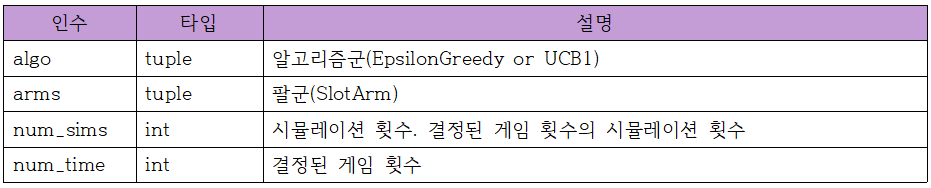

다중 슬롯머신 문제는 결정된 게임 횟수 내에서 가능한 많은 보상을 얻어내는 문제다. 결정된 게임 횟수를 몇 회 시뮬레이션할지를 인수 num_sims로, 결정된 게임 횟수가 인수 num_time이다. 시뮬레이션 횟수가 많을수록 정밀도가 올라간다.

In [ ]:
# 시뮬레이션 실행
def play(algo, arms, num_sims, num_time):
  # 이력 준비
  times = np.zeros(num_sims * num_time) # 게임 횟수의 차수
  rewards = np.zeros(num_sims * num_time) # 보상

  # 시뮬레이션 횟수별 루프
  for sim in range(num_sims):
    algo.initialize(len(arms)) # 알고리즘 설정 초기화

    # 게임 횟수별 루프
    for time in range(num_time):
      # 인덱스 계산
      index = sim * num_time + time

      # 이력 계산
      times[index] = time + 1 
      chosen_arm = algo.select_arm()
      reward = arms[chosen_arm].draw()
      rewards[index] = reward

      # 알고리즘의 파라미터 갱신
      algo.update(chosen_arm, reward, time+1)
  # 게임 횟수의 차수, 보상
  return [times, rewards]


# 시뮬레이션 실행과 클래스 표시
마지막으로 시뮬레이션 실행과 그래프 표시를 수행한다.

1. 슬롯머신 팔 준비

확률이 0.3, 0.5, 0.9인 3개의 팔을 준비.

2. 알고리즘 준비

EpsilonGreedy와 UCB1 2개의 알고리즘을 준비한다.

3. 시뮬레이션 실행

250회를 1세트로 1000세트의 시뮬레이션을 실행한다. 그리고 play()를 호출한다.

4. 그래프 표시

pandas를 이용해 일겨 데이터로부터 '게임 횟수 중 몇 번째인가?'를 종합한 평균 보상을 계산한다. 구체적으로는 DataFrame의 groupby()로 그룹화한 뒤 mean()으로 평균 보상을 계산한다.

표시된 그래프를 확인하면 UCB1 쪽이 게임 시작부터 보상이 높은 것을 알 수 있다.

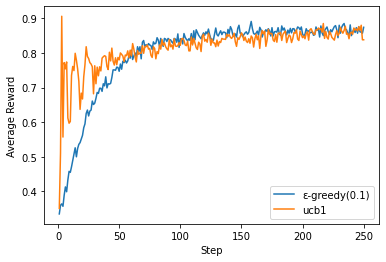

In [ ]:
# 팔 선택
arms = (SlotArm(0.3), SlotArm(0.5), SlotArm(0.9))

# 알고리즘 준비
algos = (EpsilonGreedy(0.1), UCB1())

for algo in algos:
  # 시뮬레이션 실행
  results = play(algo, arms, 1000, 250)

  # 그래프 표시
  df = pd.DataFrame({'times':results[0], 'rewards':results[1]})
  mean = df['rewards'].groupby(df['times']).mean()
  plt.plot(mean, label = algo.label())

plt.xlabel('Step')
plt.ylabel('Average Reward')
plt.legend(loc = 'best')
plt.show()